# INTRODUCTION

This case study is the Capstone Project of **Google Data Analytics Professional Certificate**. The **6 steps of Data Analysis** is used to present this analysis.


Title: **Bellabeat Case Study**

Author: Katie Huang

Date: 2 June 2021

***

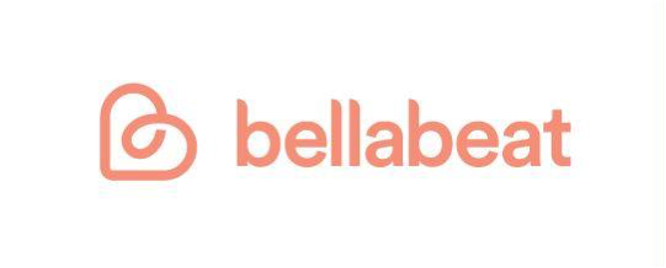

## Bellabeat: How Can A Wellness Technology Company Play It Smart?

# STEP 1: ASK

#### 1.0 Background

Bellabeat is a high-tech manufacturer of beautifully-designed health-focused smart products for women since 2013. Inspiring and empowering women with knowledge about their own health and habits, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for females.

The co-founder and Chief Creative Officer, Urška Sršen is confident that an analysis of non-Bellebeat consumer data (ie. FitBit fitness tracker usage data) would reveal more opportunities for growth.

#### 1.2 Business Task:

```
Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.
```


#### 1.3 Business Objectives:  
1. What are the trends identified?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?



#### 1.4 Deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of analysis
5. Supporting visualizations and key findings
6. High-level content recommendations based on the analysis


#### 1.5 Key Stakeholders:
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
2. Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
3. Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.


***


# STEP 2: PREPARE


#### 2.1 Information on Data Source:
1. The data is publicly available on [Kaggle: FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) and stored in 18 csv files. 
2. Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
3. 30 FitBit users who consented to the submission of personal tracker data.
4. Data collected includes (1) physical activity recorded in minutes, (2) heart rate, (3) sleep monitoring, (4) daily activity and (5) steps.

    
#### 2.2 Limitations of Data Set:
1. Data collected from year 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.
2. Sample size of 30 female FitBit users is not representative of the entire female population. 
3. As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.


#### 2.3 Is Data ROCCC?

A good data source is ROCCC which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.
1. Reliable - LOW - Not reliable as it only has 30 respondents
2. Original - LOW - Third party provider (Amazon Mechanical Turk)
3. Comprehensive - MED - Parameters match most of Bellabeat's products' parameters
4. Current - LOW - Data is 5 years old and is not relevant
5. Cited - LOW - Data collected from third party, hence unknown

Overall, the dataset is considered bad quality data and it is not recommended to produce business recommendations based on this data.


#### 2.4 Data Selection:
The following file is selected and copied for analysis. 
```
    • dailyActivity_merged.csv
```


***

# STEP 3: PROCESS

We are using Python to prepare and process the data.


#### 3.1 Preparing the Environment

The ```numPy, pandas, matplotlib, datetime``` packages are installed and aliased for easy reading.

In [1]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import datetime as dt # date time

#### 3.2 Importing data set

Reading in the selected file.

In [2]:
# read_csv function to read the required CSV file
daily_activity = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

#### 3.3 Data cleaning and manipulation

##### Steps

1. Observe and familiarize with data

2. Check for null or missing values

3. Perform sanity check of data

Previewing using head function to show the first 10 rows of daily_activity to familiarise with the data.

In [3]:
# preview first 10 rows with all columns
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


Then, finding out whether there is any null or missing values in daily_activity.

In [4]:
# obtain the # of missing data points per column
missing_values_count = daily_activity.isnull().sum()

# look at the # of missing points in all columns
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Finding out the basic information of daily_activity:
* no. of rows and columns
* name of columns
* type of value

In [5]:
# show basic information of data
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Counting the unique ID and to confirm whether data set has 30 IDs.

In [6]:
# count distinct value of "Id"
unique_id = len(pd.unique(daily_activity["Id"]))
  
print("# of unique Id: " + str(unique_id))

# of unique Id: 33


From the above observation, noted that

1. There is no typo, Null or missing values.

2. Data frame has 940 rows and 15 columns. 

3. *ActivityDate* is wrongly classified as ```object``` dtype and has to be converted to ```datetime64``` dtype.

4. There are 33 unique IDs, instead of 30 unique IDs as expected from 30 fitness tracker users.

The following data manipulation is performed:

1. Convert *ActivityDate* to ```datatime64``` dtype.

2. Convert format of *ActivityDate* to ```yyyy-mm-dd```.

3. Create new column *DayOfTheWeek* by separating the date into day of the week for further analysis.

4. Create new column *TotalMins* being the sum of *VeryActiveMinutes*, *FairlyActiveMinutes*, *LightlyActiveMinutes* and *SedentaryMinutes*.

5. Create new column *TotalHours* by converting new column in #4 to number of hours.

6. Rearrange and rename columns.

Converting *ActivityDate* from ```object``` to ```datatime64``` dtype and converting format of *ActivityDate* to ```yyyy-mm-dd```. Then, printing head to confirm whether it has been updated to ```datatime64``` dtype and dates to ```yyyy-mm-dd```.

In [7]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

# re-print information to confirm
daily_activity.info()

# print the first 5 rows of "ActivityDate" to confirm
daily_activity["ActivityDate"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

Creating new list with rearranged column names and renaming ```daily_activity``` to a shorter name ```df_activity```.

In [8]:
#r create new list of rearranged columns
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

# reindex function to rearrange columns based on "new_cols"
df_activity = daily_activity.reindex(columns=new_cols)

# print 1st 5 rows to confirm
df_activity.head(5)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


Creating new column by separating the date into day of the week for further analysis.

In [9]:
# create new column "day_of_the_week" to represent day of the week 
df_activity["DayOfTheWeek"] = df_activity["ActivityDate"].dt.day_name()

# print 1st 5 rows to confirm
df_activity["DayOfTheWeek"].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object



Rearranging and renaming columns from ```XxxYyy``` to ```xxx_yyy```.

In [10]:
# rename columns
df_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# print column names to confirm
print(df_activity.columns.values)
df_activity.head(5)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


Creating new column *total_mins* being the sum of total time logged.

In [11]:
# create new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]
df_activity["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

Creating new column by converting *total_mins*  to number of hours.

In [12]:
# create new column *total_hours* by converting to hour and round float to two decimal places
df_activity["total_hours"] = round(df_activity["total_mins"] / 60)

# print 1st 5 rows to confirm
df_activity["total_hours"].head(5)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

Data cleaning and manipulation is completed. Hence, data is now ready to be analysed. 

***

# STEP 4: ANALYZE

#### 4.1 Perform calculations

Pulling the statistics of df_activity for analysis:
* count - no. of rows
* mean (average)
* std (standard deviation)
* min and max
* percentiles 25%, 50%, 75%

In [13]:
# pull general statistics
df_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


Interpreting statistical findings:

1. On average, users logged 7,637 steps or 5.4km which is not adequate. As recommended by CDC, an adult female has to aim at least 10,000 steps or 8km per day to benefit from general health, weight loss and fitness improvement. [Source: Medical News Today article](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day)

2.  Sedentary users are the majority logging on average 991 minutes or 20 hours making up 81% of total average minutes.

3. Noting that average calories burned is 2,303 calories equivalent to 0.6 pound. Could not interpret into detail as calories burned depend on several factors such as the age, weight, daily tasks, exercise, hormones and daily calorie intake. [Source: Health Line article](https://www.healthline.com/health/fitness-exercise/how-many-calories-do-i-burn-a-day#Burning-calories)

***



# STEP 5: SHARE

In this step, we are creating visualizations and communicating our findings based on our analysis.

#### 5.1 Data Visualisation and Findings

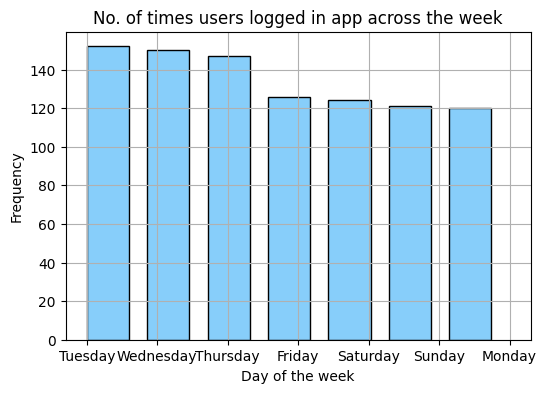

In [14]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df_activity.day_of_the_week, bins = 7, 
         width = 0.6, color = "lightskyblue", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()

##### **Frequency of usage across the week**

In this histogram, we are looking at the frequency of FitBit app usage in terms of days of the week. 

1. We discovered that users prefer or remember (giving them the doubt of benefit that they forgotten) to track their activity on the app during midweek from Tuesday to Friday. 

2. Noting that the frequency dropped on Friday and continue on weekends and Monday. 

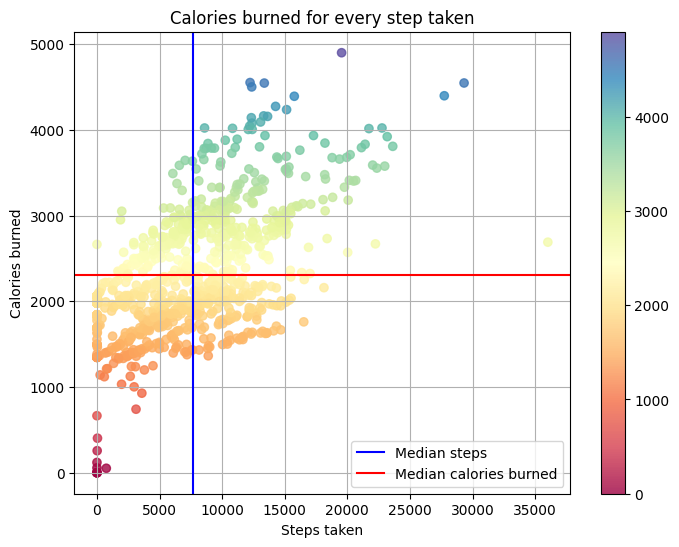

In [15]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df_activity.total_steps, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories, 
            cmap = "Spectral")

# add annotations and visuals
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

##### **Calories burned for every step taken**

From the scatter plot, we discovered that:

1. It is a positive correlation. 

2. We observed that intensity of calories burned increase when users are at the range of > 0 to 15,000 steps with calories burn rate cooling down from 15,000 steps onwards. 

3. Noted a few outliers:
    - Zero steps with zero to minimal calories burned. 
    - 1 observation of > 35,000 steps with < 3,000 calories burned.
    - Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data collection (ie. miscalculations, data contamination or human error).

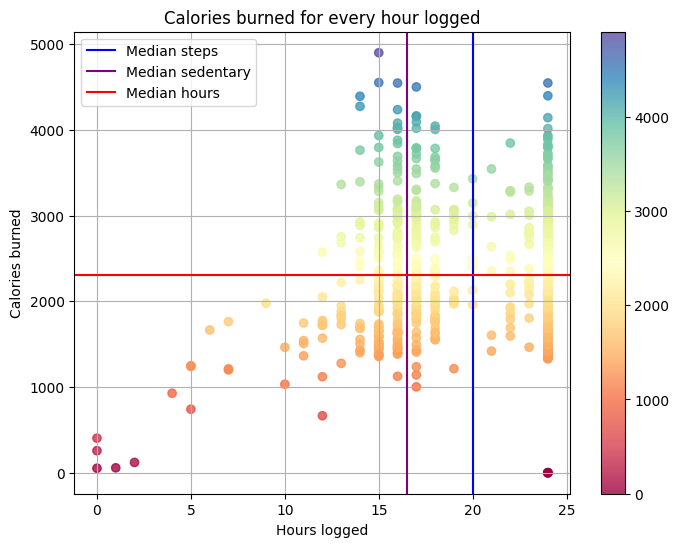

In [16]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(df_activity.total_hours, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories, 
            cmap = "Spectral")

# adding annotations and visuals
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.legend()
plt.grid(True)
plt.show()

##### **Calories burned for every hour logged**

The scatter plot is showing:

1. A weak positive correlation whereby the increase of hours logged does not translate to more calories being burned. That is largely due to the average sedentary hours (purple line) plotted at the 16 to 17 hours range. 

2. Again, we can see a few outliers:
   - The same zero value outliers
   - An unusual red dot at the 24 hours with zero calorie burned which may be due to the same reasons as above.

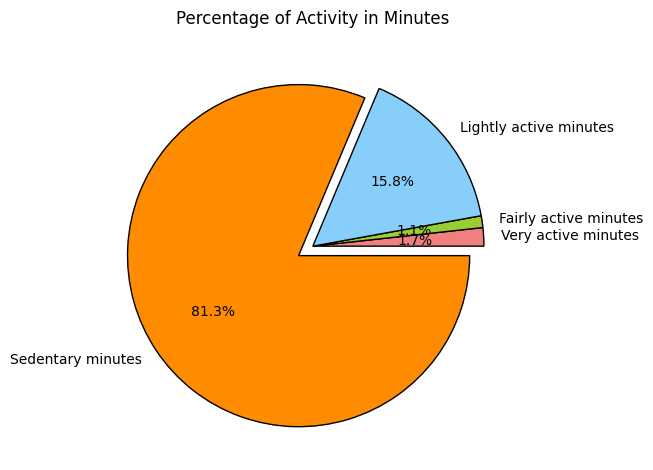

In [17]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

# calculating total of individual minutes column
very_active_mins = df_activity["very_active_mins"].sum()
fairly_active_mins = df_activity["fairly_active_mins"].sum()
lightly_active_mins = df_activity["lightly_active_mins"].sum()
sedentary_mins = df_activity["sedentary_mins"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

**Percentage of Activity in Minutes**

As seen from the pie chart, 

1. Sedentary minutes takes the biggest slice at 81.3%. 

2. This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands. 

3. App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

# STEP 6: ACT

In the final step, we will be delivering our insights and providing recommendations based on our analysis. 

Here, we revisit our business questions and share with you our high-level business recommendations.
 
**1. What are the trends identified?**

* Majority of users (81.3%) are using the FitBit app to track sedentary activities and not using it for tracking their health habits.

* Users prefer to track their activities during weekdays as compared to weekends - perhaps because they spend more time outside on weekdays and stay in on weekends. 

**2. How could these trends apply to Bellabeat customers?**

* Both companies develop products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health and fitness can very well abe pplied to Bellabeat customers.

**3. How could these trends help influence Bellabeat marketing strategy?**

* Bellabeat marketing team can encourage users by educating and equipping them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the Bellabeat app.

* On weekends, Bellabeat app can also prompt notification to encourage users to exercise.


***

